In [1]:
import pandas as pd
import numpy as np
import pathlib

%pylab inline
plt.style.use('bmh')

%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
CLOUD = False

if CLOUD:
    DATA_DIR = pathlib.Path
else:
    ROOT_PATH = pathlib.Path('/home/stanislav/y-data/2_semester/handson/time-series/')
    DATA_DIR = ROOT_PATH.joinpath('data/gestures/UCRArchive_2018/UWaveGestureLibraryAll')
    


In [3]:
df = pd.read_csv(DATA_DIR.joinpath('UWaveGestureLibraryAll_TRAIN.tsv'),sep='\t',header=None)


In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,936,937,938,939,940,941,942,943,944,945
0,6,-0.312502,-0.312502,-0.312502,-0.312502,-0.312502,-0.312502,-0.312502,-0.312502,-0.312502,...,0.512194,0.503002,0.492524,0.482045,0.463662,0.445278,0.426895,0.408511,0.390129,0.371746
1,5,1.629721,1.629721,1.629721,1.629721,1.629721,1.629721,1.629721,1.629721,1.629721,...,-0.424252,-0.424252,-0.424252,-0.424414,-0.426015,-0.437960,-0.449905,-0.461849,-0.473794,-0.485739
2,5,0.665410,0.665410,0.665410,0.665410,0.665410,0.665410,0.665410,0.665410,0.665410,...,-0.856895,-0.856895,-0.856895,-0.856895,-0.856895,-0.856895,-0.856895,-0.856895,-0.856895,-0.856895
3,3,0.164887,0.164887,0.164887,0.164887,0.164887,0.164887,0.164887,0.164887,0.164887,...,-0.194748,-0.131015,-0.286569,0.051284,0.389136,0.149143,0.245672,0.437129,0.639840,0.842551
4,4,1.272493,1.272493,1.272493,1.272493,1.272493,1.272493,1.272493,1.272493,1.272493,...,1.852405,1.819330,1.741195,1.624052,1.506909,1.439170,1.500978,1.618121,1.735263,1.852405


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Columns: 946 entries, 0 to 945
dtypes: float64(945), int64(1)
memory usage: 6.5 MB


In [6]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,936,937,938,939,940,941,942,943,944,945
count,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,...,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000
mean,4.443080,0.066616,0.067189,0.067159,0.066602,0.067621,0.067852,0.067984,0.068170,0.067788,...,0.058551,0.055970,0.053682,0.049908,0.043954,0.033796,0.023649,0.025101,0.014773,0.003791
std,2.276697,0.879800,0.879779,0.879897,0.880401,0.880793,0.881377,0.881208,0.880945,0.880903,...,0.804118,0.806391,0.807000,0.809462,0.812836,0.815068,0.818936,0.823484,0.826452,0.835093
min,1.000000,-2.126119,-2.126119,-2.126119,-2.126119,-2.126119,-2.126119,-2.126119,-2.126119,-2.126119,...,-2.970508,-3.011893,-2.788442,-2.691817,-2.691817,-2.693807,-2.798523,-2.903239,-3.007955,-3.112671
25%,2.000000,-0.641336,-0.643919,-0.645140,-0.645140,-0.646110,-0.646110,-0.648372,-0.648372,-0.648372,...,-0.388354,-0.385675,-0.380673,-0.382149,-0.400120,-0.383583,-0.420228,-0.406997,-0.424260,-0.431900
50%,5.000000,0.160417,0.162206,0.160417,0.160417,0.161911,0.165147,0.170389,0.167079,0.166452,...,0.113627,0.130991,0.122954,0.122550,0.121115,0.110076,0.092023,0.058344,-0.064388,-0.103311
75%,6.000000,0.735286,0.740572,0.741891,0.744947,0.747096,0.747096,0.744947,0.747096,0.751361,...,0.479668,0.457268,0.445608,0.438778,0.438620,0.430140,0.433734,0.434490,0.409958,0.412974
max,8.000000,2.603881,2.603881,2.603881,2.603881,2.603881,2.603881,2.532057,2.434660,2.328228,...,3.293352,3.359410,3.593122,3.958140,4.113091,4.234763,4.234763,4.184847,3.720974,3.790118


In [7]:
df.shape

(896, 946)

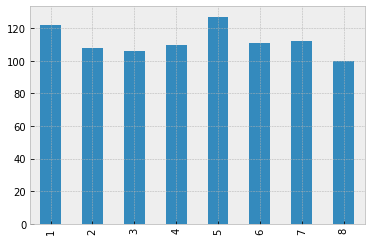

In [8]:
df[0].value_counts().sort_index().plot(kind='bar')

In [9]:
COLS = [f"{col_name}_{i}" for col_name in ['x','y','z'] for i in range(315)]
COLS.insert(0,'label')
assert len(COLS) == df.shape[1]

In [10]:
df.columns = COLS
df.head()

,label,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,...,z_305,z_306,z_307,z_308,z_309,z_310,z_311,z_312,z_313,z_314
0,6,-0.312502,-0.312502,-0.312502,-0.312502,-0.312502,-0.312502,-0.312502,-0.312502,-0.312502,...,0.512194,0.503002,0.492524,0.482045,0.463662,0.445278,0.426895,0.408511,0.390129,0.371746
1,5,1.629721,1.629721,1.629721,1.629721,1.629721,1.629721,1.629721,1.629721,1.629721,...,-0.424252,-0.424252,-0.424252,-0.424414,-0.426015,-0.437960,-0.449905,-0.461849,-0.473794,-0.485739
2,5,0.665410,0.665410,0.665410,0.665410,0.665410,0.665410,0.665410,0.665410,0.665410,...,-0.856895,-0.856895,-0.856895,-0.856895,-0.856895,-0.856895,-0.856895,-0.856895,-0.856895,-0.856895
3,3,0.164887,0.164887,0.164887,0.164887,0.164887,0.164887,0.164887,0.164887,0.164887,...,-0.194748,-0.131015,-0.286569,0.051284,0.389136,0.149143,0.245672,0.437129,0.639840,0.842551
4,4,1.272493,1.272493,1.272493,1.272493,1.272493,1.272493,1.272493,1.272493,1.272493,...,1.852405,1.819330,1.741195,1.624052,1.506909,1.439170,1.500978,1.618121,1.735263,1.852405


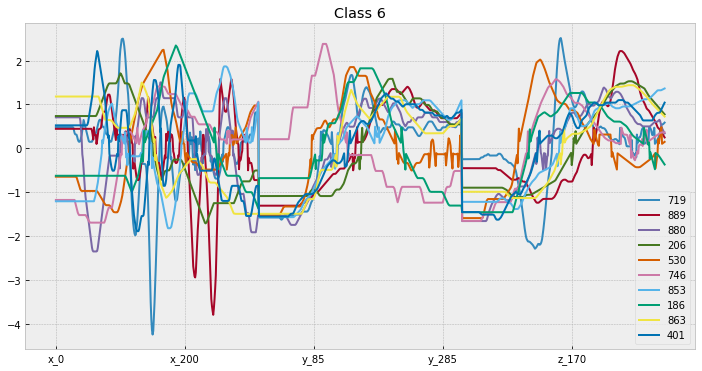

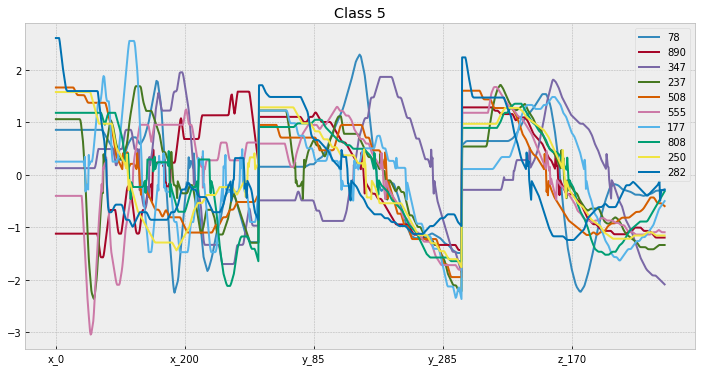

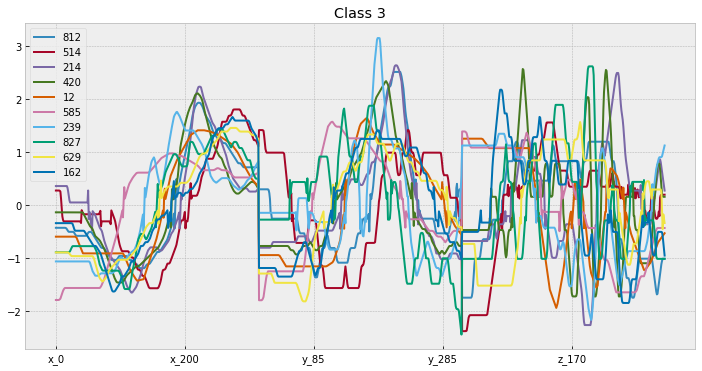

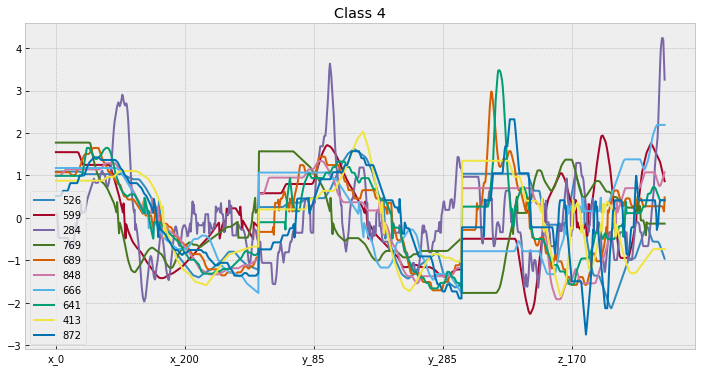

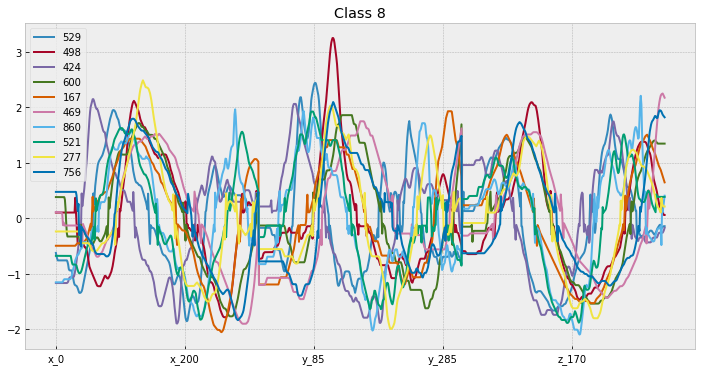

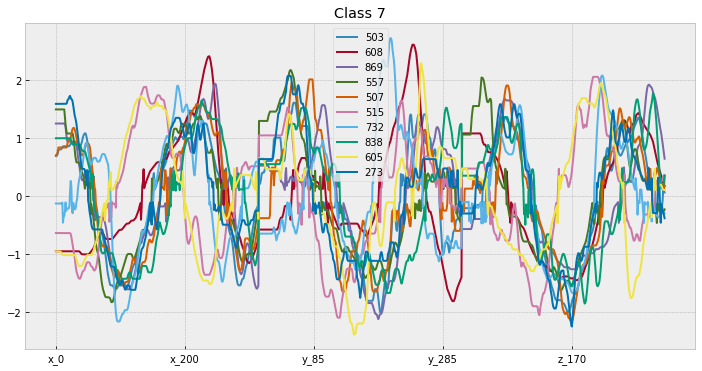

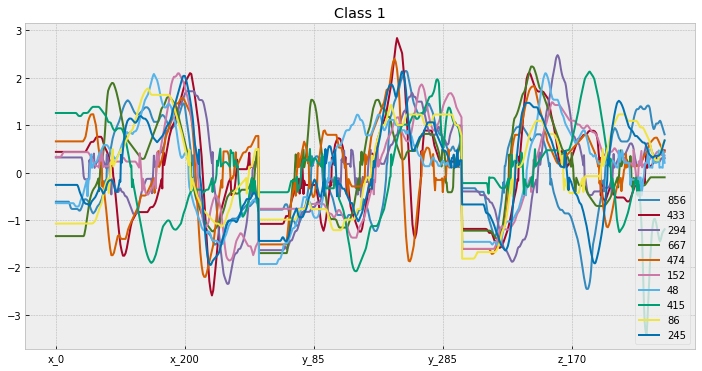

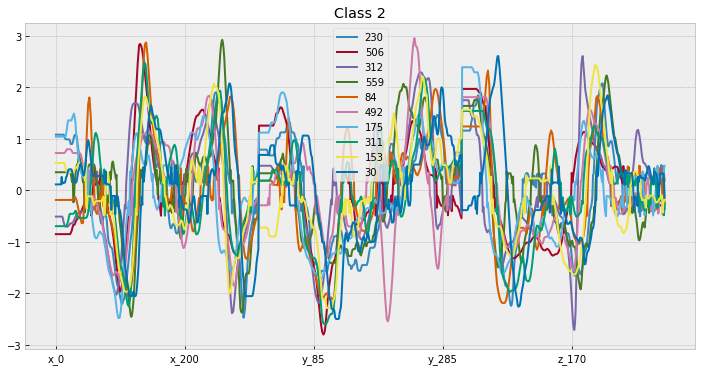

In [11]:
for i in df['label'].unique():
    sample = df[df['label']==i].sample(10)
    plt.figure(figsize=(12,6))
    sample.iloc[:,1:].transpose().plot(ax=plt.gca())
    plt.title(f'Class {i}')

In [12]:
data = df

In [13]:
X_cols = [col for col in data.columns if "x_" in col]
Y_cols = [col for col in data.columns if "y_" in col]
Z_cols = [col for col in data.columns if "z_" in col]

In [14]:
acceleration_data = pd.DataFrame(np.square(data[X_cols]).values + np.square(data[Y_cols]).values + np.square(data[Z_cols]))

In [15]:
acceleration_data.columns = [f"a_{i}" for i in range(315)]

In [16]:
data = data.join(acceleration_data)

In [17]:
data.shape

(896, 1261)

In [18]:
A_cols = [col for col in data.columns if "a_" in col]

In [19]:
AGGS = ['mean','std','median','min','max','skew']


In [20]:
features = []

for comp, cols in zip(['x','y','z','a'],[X_cols,Y_cols,Z_cols,A_cols]):
    features.append(data[cols].apply(AGGS, axis=1).rename(lambda cl: f'{comp}_{cl}',axis=1))

In [21]:
features = pd.concat(features,axis=1)

In [22]:
features.head()

,x_mean,x_std,x_median,x_min,x_max,x_skew,y_mean,y_std,y_median,y_min,...,z_median,z_min,z_max,z_skew,a_mean,a_std,a_median,a_min,a_max,a_skew
0,-0.009253,0.997583,0.372056,-3.002771,1.741171,-0.742626,0.017712,1.008198,0.409937,-2.121593,...,0.512562,-1.533134,1.236129,-0.544683,2.996825,2.112909,2.022507,0.410567,10.223252,1.097482
1,-0.006201,1.002359,-0.234908,-1.167222,1.629721,0.499300,0.002443,1.000379,0.281072,-1.659557,...,-0.422873,-1.162087,1.789252,0.706786,2.996825,1.486386,2.549214,1.279779,6.305239,1.048263
2,-0.011643,1.003550,-0.114947,-1.639466,2.097296,0.056455,0.006169,0.999898,-0.184654,-1.558264,...,0.219749,-1.440588,1.317989,-0.017563,2.996825,1.267056,3.148671,0.753056,6.128089,-0.229860
3,0.015471,1.001682,-0.277678,-1.334142,2.660826,0.965558,-0.007574,1.001403,0.265000,-1.938213,...,0.186464,-1.863714,2.564909,0.219132,2.996825,3.759296,1.709718,0.251784,22.748531,3.275107
4,-0.006768,1.000159,0.136838,-1.507488,1.272493,0.034201,0.011105,1.002751,0.282799,-2.247183,...,-0.475621,-1.822190,1.852405,0.663327,2.996825,2.367157,2.011264,0.834583,10.359594,1.674825


In [23]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 896 entries, 0 to 895
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   x_mean    896 non-null    float64
 1   x_std     896 non-null    float64
 2   x_median  896 non-null    float64
 3   x_min     896 non-null    float64
 4   x_max     896 non-null    float64
 5   x_skew    896 non-null    float64
 6   y_mean    896 non-null    float64
 7   y_std     896 non-null    float64
 8   y_median  896 non-null    float64
 9   y_min     896 non-null    float64
 10  y_max     896 non-null    float64
 11  y_skew    896 non-null    float64
 12  z_mean    896 non-null    float64
 13  z_std     896 non-null    float64
 14  z_median  896 non-null    float64
 15  z_min     896 non-null    float64
 16  z_max     896 non-null    float64
 17  z_skew    896 non-null    float64
 18  a_mean    896 non-null    float64
 19  a_std     896 non-null    float64
 20  a_median  896 non-null    float6

### Dimensionality reduction

In [24]:
from sklearn.decomposition import PCA

In [25]:
pca = PCA(n_components=5, whiten=True)
fts_pca = pca.fit_transform(features)

In [26]:
def plot_components(comp1,comp2,df):

    plt.figure(figsize=(6,6))
    plt.scatter(df[:, comp1], df[:, comp2], c=data["label"])
    
# for comp in range(5):
#     plot_components('x_mean','y_mean',features)


features

,x_mean,x_std,x_median,x_min,x_max,x_skew,y_mean,y_std,y_median,y_min,...,z_median,z_min,z_max,z_skew,a_mean,a_std,a_median,a_min,a_max,a_skew
0,-0.009253,0.997583,0.372056,-3.002771,1.741171,-0.742626,0.017712,1.008198,0.409937,-2.121593,...,0.512562,-1.533134,1.236129,-0.544683,2.996825,2.112909,2.022507,0.410567,10.223252,1.097482
1,-0.006201,1.002359,-0.234908,-1.167222,1.629721,0.499300,0.002443,1.000379,0.281072,-1.659557,...,-0.422873,-1.162087,1.789252,0.706786,2.996825,1.486386,2.549214,1.279779,6.305239,1.048263
2,-0.011643,1.003550,-0.114947,-1.639466,2.097296,0.056455,0.006169,0.999898,-0.184654,-1.558264,...,0.219749,-1.440588,1.317989,-0.017563,2.996825,1.267056,3.148671,0.753056,6.128089,-0.229860
3,0.015471,1.001682,-0.277678,-1.334142,2.660826,0.965558,-0.007574,1.001403,0.265000,-1.938213,...,0.186464,-1.863714,2.564909,0.219132,2.996825,3.759296,1.709718,0.251784,22.748531,3.275107
4,-0.006768,1.000159,0.136838,-1.507488,1.272493,0.034201,0.011105,1.002751,0.282799,-2.247183,...,-0.475621,-1.822190,1.852405,0.663327,2.996825,2.367157,2.011264,0.834583,10.359594,1.674825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,0.002676,1.001640,0.126056,-2.291087,1.725760,-0.482823,-0.008535,1.000007,-0.404282,-1.037922,...,-0.147868,-2.562333,2.563744,0.207206,2.996825,3.232624,1.389005,0.163689,11.986834,1.176885
892,-0.000373,1.001311,-0.243468,-1.232312,1.497695,0.223519,0.000782,1.001417,-0.208793,-1.850326,...,0.194200,-1.363224,1.826780,0.153656,2.996825,1.734437,3.377837,0.074083,6.347786,-0.090136
893,0.001489,1.001292,0.257141,-2.271709,2.106523,-0.452168,0.000805,0.999759,0.199268,-2.788136,...,0.106353,-1.832091,2.294435,0.483905,2.996825,2.389387,2.548025,0.217552,11.727864,1.345871
894,-0.010654,1.002987,-0.227565,-1.658029,2.141460,0.421246,0.007944,0.999583,0.346297,-2.166109,...,0.203966,-1.503999,2.119924,0.024832,2.996825,1.577278,2.719861,0.183221,6.957551,0.505292


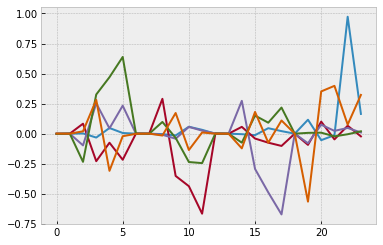

In [27]:
plt.plot(pca.components_.T)

# spectral features

In [29]:
np.fft.fft(sample.iloc[0,1:316])

array([-2.77682688e+00+0.00000000e+00j,  1.12650173e+01+6.35140253e+01j,
        2.33299353e+01-5.10121388e+01j, -7.32173458e+01-1.52729614e+02j,
        3.74778984e+01-1.11962922e+01j,  5.23853312e+01-7.64335481e+01j,
        1.09722846e+01+1.05181528e+01j,  5.67191039e+00+2.76080559e+01j,
        1.32222104e+01-2.18723459e+01j,  9.13836227e+00+6.96324676e+00j,
        9.50321492e+00+5.44073788e+00j, -3.82888363e+00+5.91802844e+00j,
       -1.09224258e+01+8.62521528e-01j, -8.55782489e+00-1.26143071e+01j,
       -1.58414300e-02-5.13987186e+00j, -5.79928890e+00-5.56754922e+00j,
       -7.81355208e+00-9.37267912e+00j,  3.79028194e+00-9.69938741e+00j,
        4.63876091e-01-6.32711197e+00j,  4.54330182e+00+1.59064278e+00j,
        5.27050149e+00-5.19144190e+00j,  7.22779800e+00-3.26029450e+00j,
        1.50509705e+00-3.53154442e+00j, -1.19983825e+00-1.14591554e+00j,
        6.79709076e-01-3.32813828e-01j, -9.14354761e-01+2.25681895e+00j,
       -3.74228331e+00-5.21280553e+00j, -2.56000263

In [34]:
# for i in range(1,9):
    
#     sample = data[data.label==i].sample(10, replace=True)
        
#     plt.figure(figsize=(12,6))
#     plt.subplot(1,3,1)
    
#     for i, row in sample.iterrows():
        
        

In [36]:
from tensorflow import keras